### <font color = black> Machine Learning pipeline using scikit-learn

To build a machine learning pipeline, the first requirement is to define the structure of the pipeline. In other words, we must list down the exact steps which would go into our machine learning pipeline.

In order to do so, we will build a prototype machine learning model on the existing data before we create a pipeline. The main idea behind building a prototype is to understand the data and necessary preprocessing steps required before the model building process. Based on our learning from the prototype model, we will design a machine learning pipeline that covers all the essential preprocessing steps.

In [1]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# read the train data
train_data = pd.read_csv('C:/Users/Nandan/Desktop/Study/Analytics Vidhya/ML Pipeline/train_kOBLwZA.csv')

# check for the null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column

In [3]:
# impute missing values in item weight by mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
# impute outlet size in training data by mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

#### <font color = black> Encode the categorical variables

In [9]:
train_data = pd.get_dummies(train_data, columns = ['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'])


# data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 47 columns):
Item_Identifier                    8523 non-null object
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_LF                8523 non-null uint8
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item

### <font color = black>Scale the data:

In [11]:
from sklearn.preprocessing import StandardScaler
# create an object of the StandardScaler
scaler = StandardScaler()
# fit with the Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))
# transform the data
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

### <font color = black>Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression and Random Forest Regressor to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

 Let us train a linear regression model on this data and check it’s performance on the validation set. To check the model performance, we are using RMSE as an evaluation metric.

In [12]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# separate the independent and target variable 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

Let us train a linear regression model on this data and check it’s performance on the validation set. To check the model performance, we are using RMSE as an evaluation metric.

In [13]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_x, train_y)

# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1120.4107267029603
RMSE on test data:  1148.7358978042125


The linear regression model has a very high RMSE value on both training and validation data. Let us see if a tree-based model performs better in this case. Here we will train a random forest and check if we get any improvement in the train and validation errors.

In [14]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

D:\Python\Installation\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE on train data:  907.2254845216993
RMSE on test data:  1128.0570716351747


A very interesting feature of the random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data. Let us see how can we use this attribute to make our model simpler and better!

After the preprocessing and encoding steps, we had a total of 45 features and not all of these may be useful in forecasting the sales. Alternatively we can select the top 5 or top 7 features, which had a major contribution in forecasting sales values.

If the model performance is similar in both the cases, that is – by using 45 features and by using 5-7 features, then we should use only the top 7 features, in order to keep the model more simple and efficient.

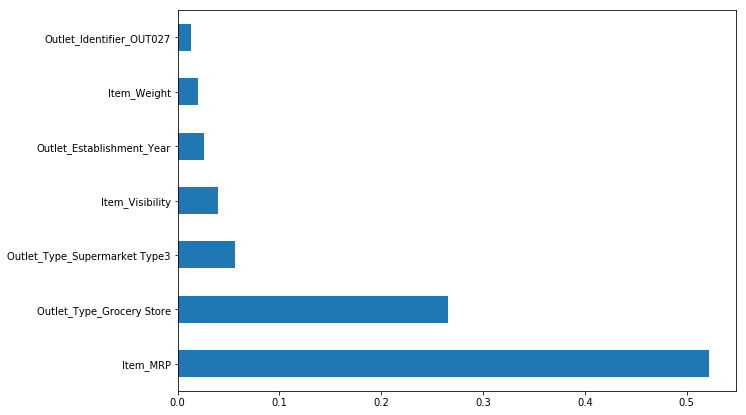

In [15]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [16]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

D:\Python\Installation\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE on train data:  910.5103433743817
RMSE on test data:  1127.3894117657537


 Using only 7 features has given almost the same performance as the previous model where we were using 45 features. Let us identify the final set of features that we need and the preprocessing steps for each of them

**Selected Features and Preprocessing Steps**

**Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale this values.

**Outlet_Type_Grocery_Store:** A binary column which indicates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 ( if outlet type is something else).

**Item_Visibility:** Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we didn’t apply any preprocessing steps on this variable.

**Outlet_Type_Supermarket_Type3:** Another binary column indicating if the outlet type is a “supermarket_type_3” or not. To capture this information we will create binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (othewise).

**Outlet_Identifier_OUT027:** This feature specifies whether the outlet identifier is “OUT027” or not. Similar to the last previous example, we will create a separate column that carries 1 (if outlet type is grocery store) and 0 (otherwise).

**Outlet_Establishment_Year:** The Outlet_Establishment_Year describes year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline as well.

**Item_Weight:** During the preprocessing steps we observed that Item_Weight had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the machine learning pipeline.

Apart from these 7 columns, we will drop the rest of the columns since we will not use them to train the model. Let us go ahead and design our ML pipeline!

***<font size = 4>Pipeline Design***

We will define our pipeline in three stages:

1. Create the required binary features
2. Perform required data preprocessing and transformations
3. Build a model to predict the sales

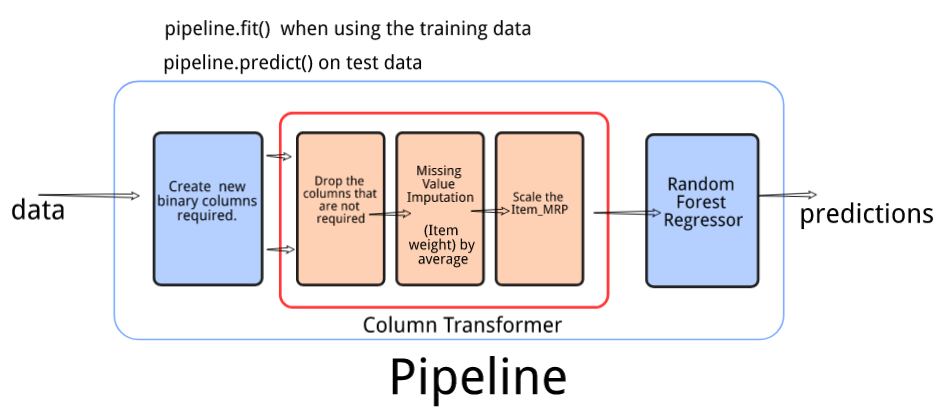

**1. Create the required binary features**

We will create a custom transformer that will add 3 new binary columns to the existing data.

* Outlet_Type : Grocery Store
* Outlet_Type : Supermarket Type3
* Outlet_Identifier_OUT027 

**2. Data Preprocessing and transformations**

We will use a ColumnTransformer to do the required transformations. It will contain 3 steps.

- Drop the columns that are not required for model training
- Impute missing values in the column Item_Weight using the average
- Scale the column Item_MRP using  StandardScaler()

**3. Use the model to predict the target on the cleaned data**

This will be the final step in the pipeline. In the last two steps we preprocessed the data and made it ready for the model building process. Finally, we will use this data and build a machine learning model to predict the Item Outlet Sales.

**<font size = 3>Building Pipeline**

In [18]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
#import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# read the training data set
data = pd.read_csv('C:/Users/Nandan/Desktop/Study/Analytics Vidhya/ML Pipeline/train_kOBLwZA.csv')

# top rows of the data
data.head()

# seperate the independent and target variables
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']

We need to create 3 new binary columns using a custom transformer. Here are the steps we need to follow to create a custom transformer.

- Define a class OutletTypeEncoder
- Add the parameter BaseEstimator while defining the class
- The class must contain fit and transform methods

In the transform method, we will define all the 3 columns that we want after the first stage in our ML pipeline.

In [20]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

Next we will define the pre-processing steps required before the model building process.

- Drop the columns – Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year
- Impute missing values in column Item_Weight with mean
- Scale the column Item_MRP using StandardScaler().

This will be the second step in our machine learning pipeline. After this step, the data will be ready to be used by the model to make predictions.

In [21]:
# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

**Predict the target**

This will be the final block of the machine learning pipeline – define the steps in order for the pipeline object! As you can see in the code below we have specified three steps – create binary columns, preprocess the data, train a model.

When we use the fit() function with a pipeline object, all three steps are executed. Post the model training process, we use the predict() function that uses the trained model to generate the predictions.

In [22]:
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
model_pipeline.predict(train_x)

D:\Python\Installation\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([4125.52249642,  645.60164729, 2443.67220635, ..., 1287.24545144,
       1410.15236359, 1176.92845236])

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

In [23]:
# read the test data
test_data = pd.read_csv('C:/Users/Nandan/Desktop/Study/Analytics Vidhya/ML Pipeline/test_t02dQwI.csv')

# predict target variables on the test data 
model_pipeline.predict(test_data)

array([1778.93057391, 1269.11817643,  643.58782274, ..., 1872.38931025,
       4201.92182184, 1400.12279336])